# Imports

In [2]:
import numpy as np
from torchsummary import summary
import torch
import matplotlib.pyplot as plt

# Load model

In [14]:
model_path = './models/'
model_type = 'ShallowFBCSPNet'
data_type = 'simulated'
model = torch.load(model_path + f'{model_type}_{data_type}')

In [15]:
model.eval()

Sequential(
  (dimshuffle): Expression(expression=_transpose_time_to_spat)
  (conv_time): Conv2d(1, 40, kernel_size=(25, 1), stride=(1, 1))
  (conv_spat): Conv2d(40, 40, kernel_size=(1, 18), stride=(1, 1), bias=False)
  (bnorm): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_nonlin): Expression(expression=square)
  (pool): AvgPool2d(kernel_size=(75, 1), stride=(15, 1), padding=0)
  (pool_nonlin): Expression(expression=safe_log)
  (drop): Dropout(p=0.5, inplace=False)
  (conv_classifier): Conv2d(40, 2, kernel_size=(4, 1), stride=(1, 1))
  (softmax): LogSoftmax()
  (squeeze): Expression(expression=_squeeze_final_output)
)

In [16]:
w = list(model.parameters())

In [26]:
w[1]

Parameter containing:
tensor([-1.8632e-05, -9.4120e-06,  1.3964e-06, -4.9433e-05,  1.3443e-05,
        -8.5335e-06,  2.7218e-05, -1.0303e-05, -5.1951e-05, -6.8409e-06,
        -1.8362e-06, -1.6272e-05,  4.4823e-05,  7.1806e-06, -3.8072e-05,
        -2.8632e-05,  3.6873e-05,  6.7596e-06,  1.8140e-05, -9.9768e-06,
        -2.8157e-05, -3.0608e-05,  3.4995e-06, -1.0425e-05,  6.2148e-05,
        -1.4549e-06,  1.8421e-05,  2.6778e-05, -1.8166e-05, -2.5099e-05,
        -1.0824e-05,  4.5743e-05,  5.0138e-05,  2.7370e-05, -2.0530e-05,
        -3.0001e-05,  8.3130e-06,  6.7546e-08,  3.1428e-07,  2.2439e-07],
       device='cuda:0', requires_grad=True)

In [27]:
tensor_time = np.array(w[1].data.cpu())

In [28]:
tensor_time.shape

(40,)

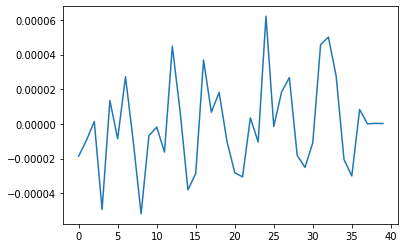

In [19]:
plt.plot(tensor_time)

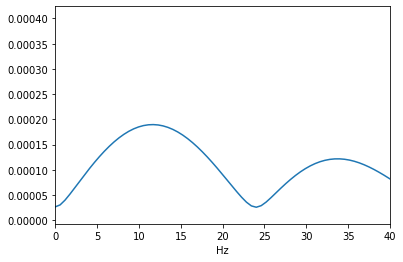

In [30]:
import scipy.signal as ss
b = tensor_time
f, h0= ss.freqz(b, a=1, worN=512, whole=False,  fs=600)


plt.figure()
plt.plot(f, abs(h0))
plt.xlabel('Hz')
plt.xlim((0,40))
plt.show()

In [10]:
tensor_spat = np.array(w[2].data.cpu())

In [26]:
tensor_spat = tensor_spat.reshape([40,40,19])

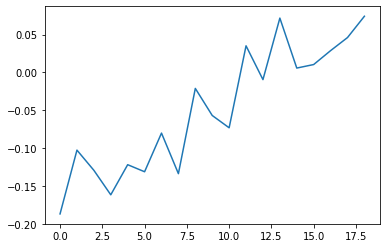

In [27]:
plt.plot(tensor_spat[0,0,:])